# AAI 510 - Final Project
by Bryan Carr
30 June 2022
AAI 510 - Machine Learning Fundamentals
University of San Diego

In this project, we will build a model to predict what applicants should be approved for a mortgage. This is based on the Home Credit dataset

In [279]:
## read libraries in
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, plot_importance
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve



## 1. Data Analysis



In [2]:
## Reading in the Data

application_df = pd.read_csv('data/application_train.csv')

In [3]:
# Basic Info
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
# Look at the Shape, i.e. size of data
application_df.shape

(307511, 122)

In [5]:
# Look at some Summary Statistics
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# Look at the Column names
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
# look at the DTypes in the data
application_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
# Count the number of Nulls
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

<AxesSubplot:>

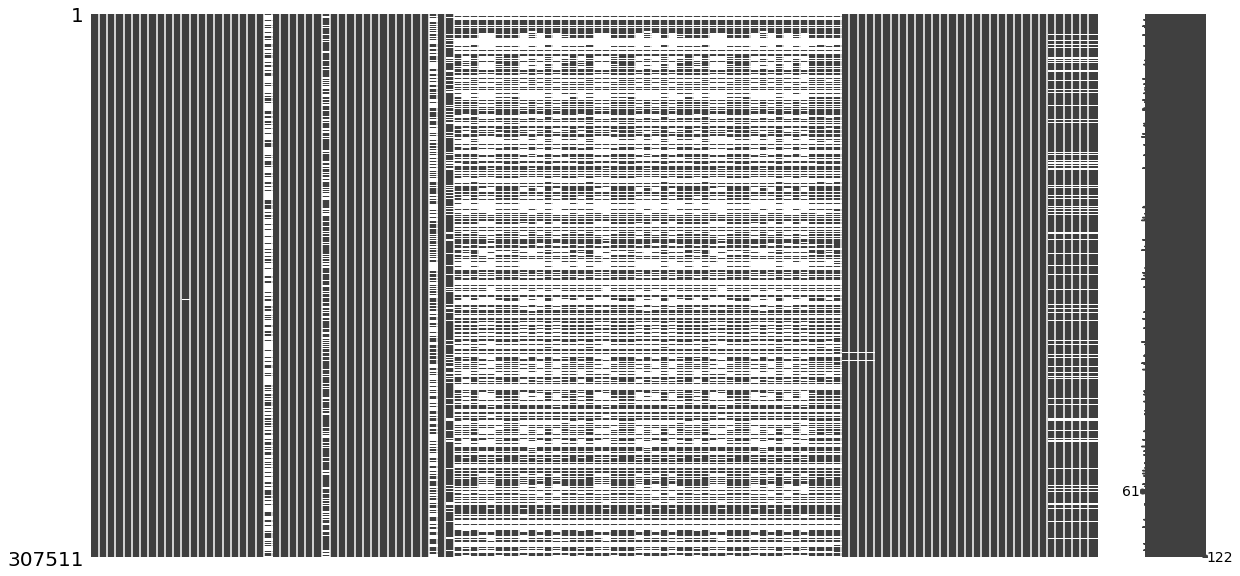

In [9]:
# Let's use the MissingNo library to help plot Nulls, as a series of tick plots.
import missingno as mno

mno.matrix(application_df, figsize=(20,10))

We can see there are many null values in the middle of the dataframe. These correspond with the 'building attribute' columns, APARTMENTS_AVG to EMERGENCYSTATE_MODE. According to the documentation, these describe:

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

It's not clear what building this is referring to, or how it relates to the task at hand. Therefore I'm comfortable with dropping them.

In [10]:
# Check location of first column to drop
application_df.columns[44]

'APARTMENTS_AVG'

In [11]:
# Confirm location of last column to drop
application_df.columns[90]

'EMERGENCYSTATE_MODE'

In [12]:
application_df.drop(axis=0, columns=application_df.columns[44:91], inplace=True)

In [13]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


We can see there are also a significant number of nulls in OWN_CAR_AGE, OCCUPATION_TYPE, EXT_SOURCE 1 and 3, and the AMT_CREDIT_REQ columns. We will deal with those later. For now, let's continue with some general EDA.

It's important to consider the Target data. Let's create a quick bar graph to visualize them.

<AxesSubplot:xlabel='TARGET', ylabel='count'>

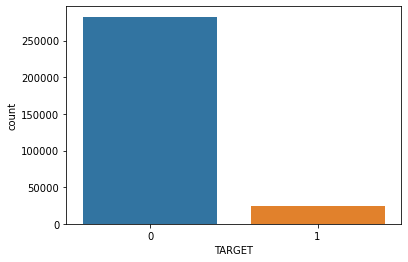

In [14]:
sns.countplot(data=application_df, x='TARGET')

In [15]:
# Total number of TARGET values, i.e. length of dataframe
application_df['TARGET'].count()

307511

In [16]:
# Total number of Positive values of Target - the smaller of the two
application_df['TARGET'].sum()

24825

In [17]:
# Percentage of data in the Positive target category
24825 / 307511

0.08072881945686496

We can see we have an imbalanced dataset, with approx 8% of the data in the 'Positive' result (i.e. has trouble making loan payments), and 92% in the negative. This will require some special handling - selection of models that are well suited to dealing with imbalanced data; weighting of the categories during the ML building; stratified splitting of the data to ensure a fair distribution in testing, training and validation splits;

Let's focus on plotting some of the variables we expect to be important -- the key numeric and categorical features.

In [31]:
key_numeric_vars = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [29]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
key_vars_df = application_df[key_numeric_vars]

In [ ]:
# key_vars_df.plot.hist(bins=10, subplots=True, sharex=False, figsize=(10,10))

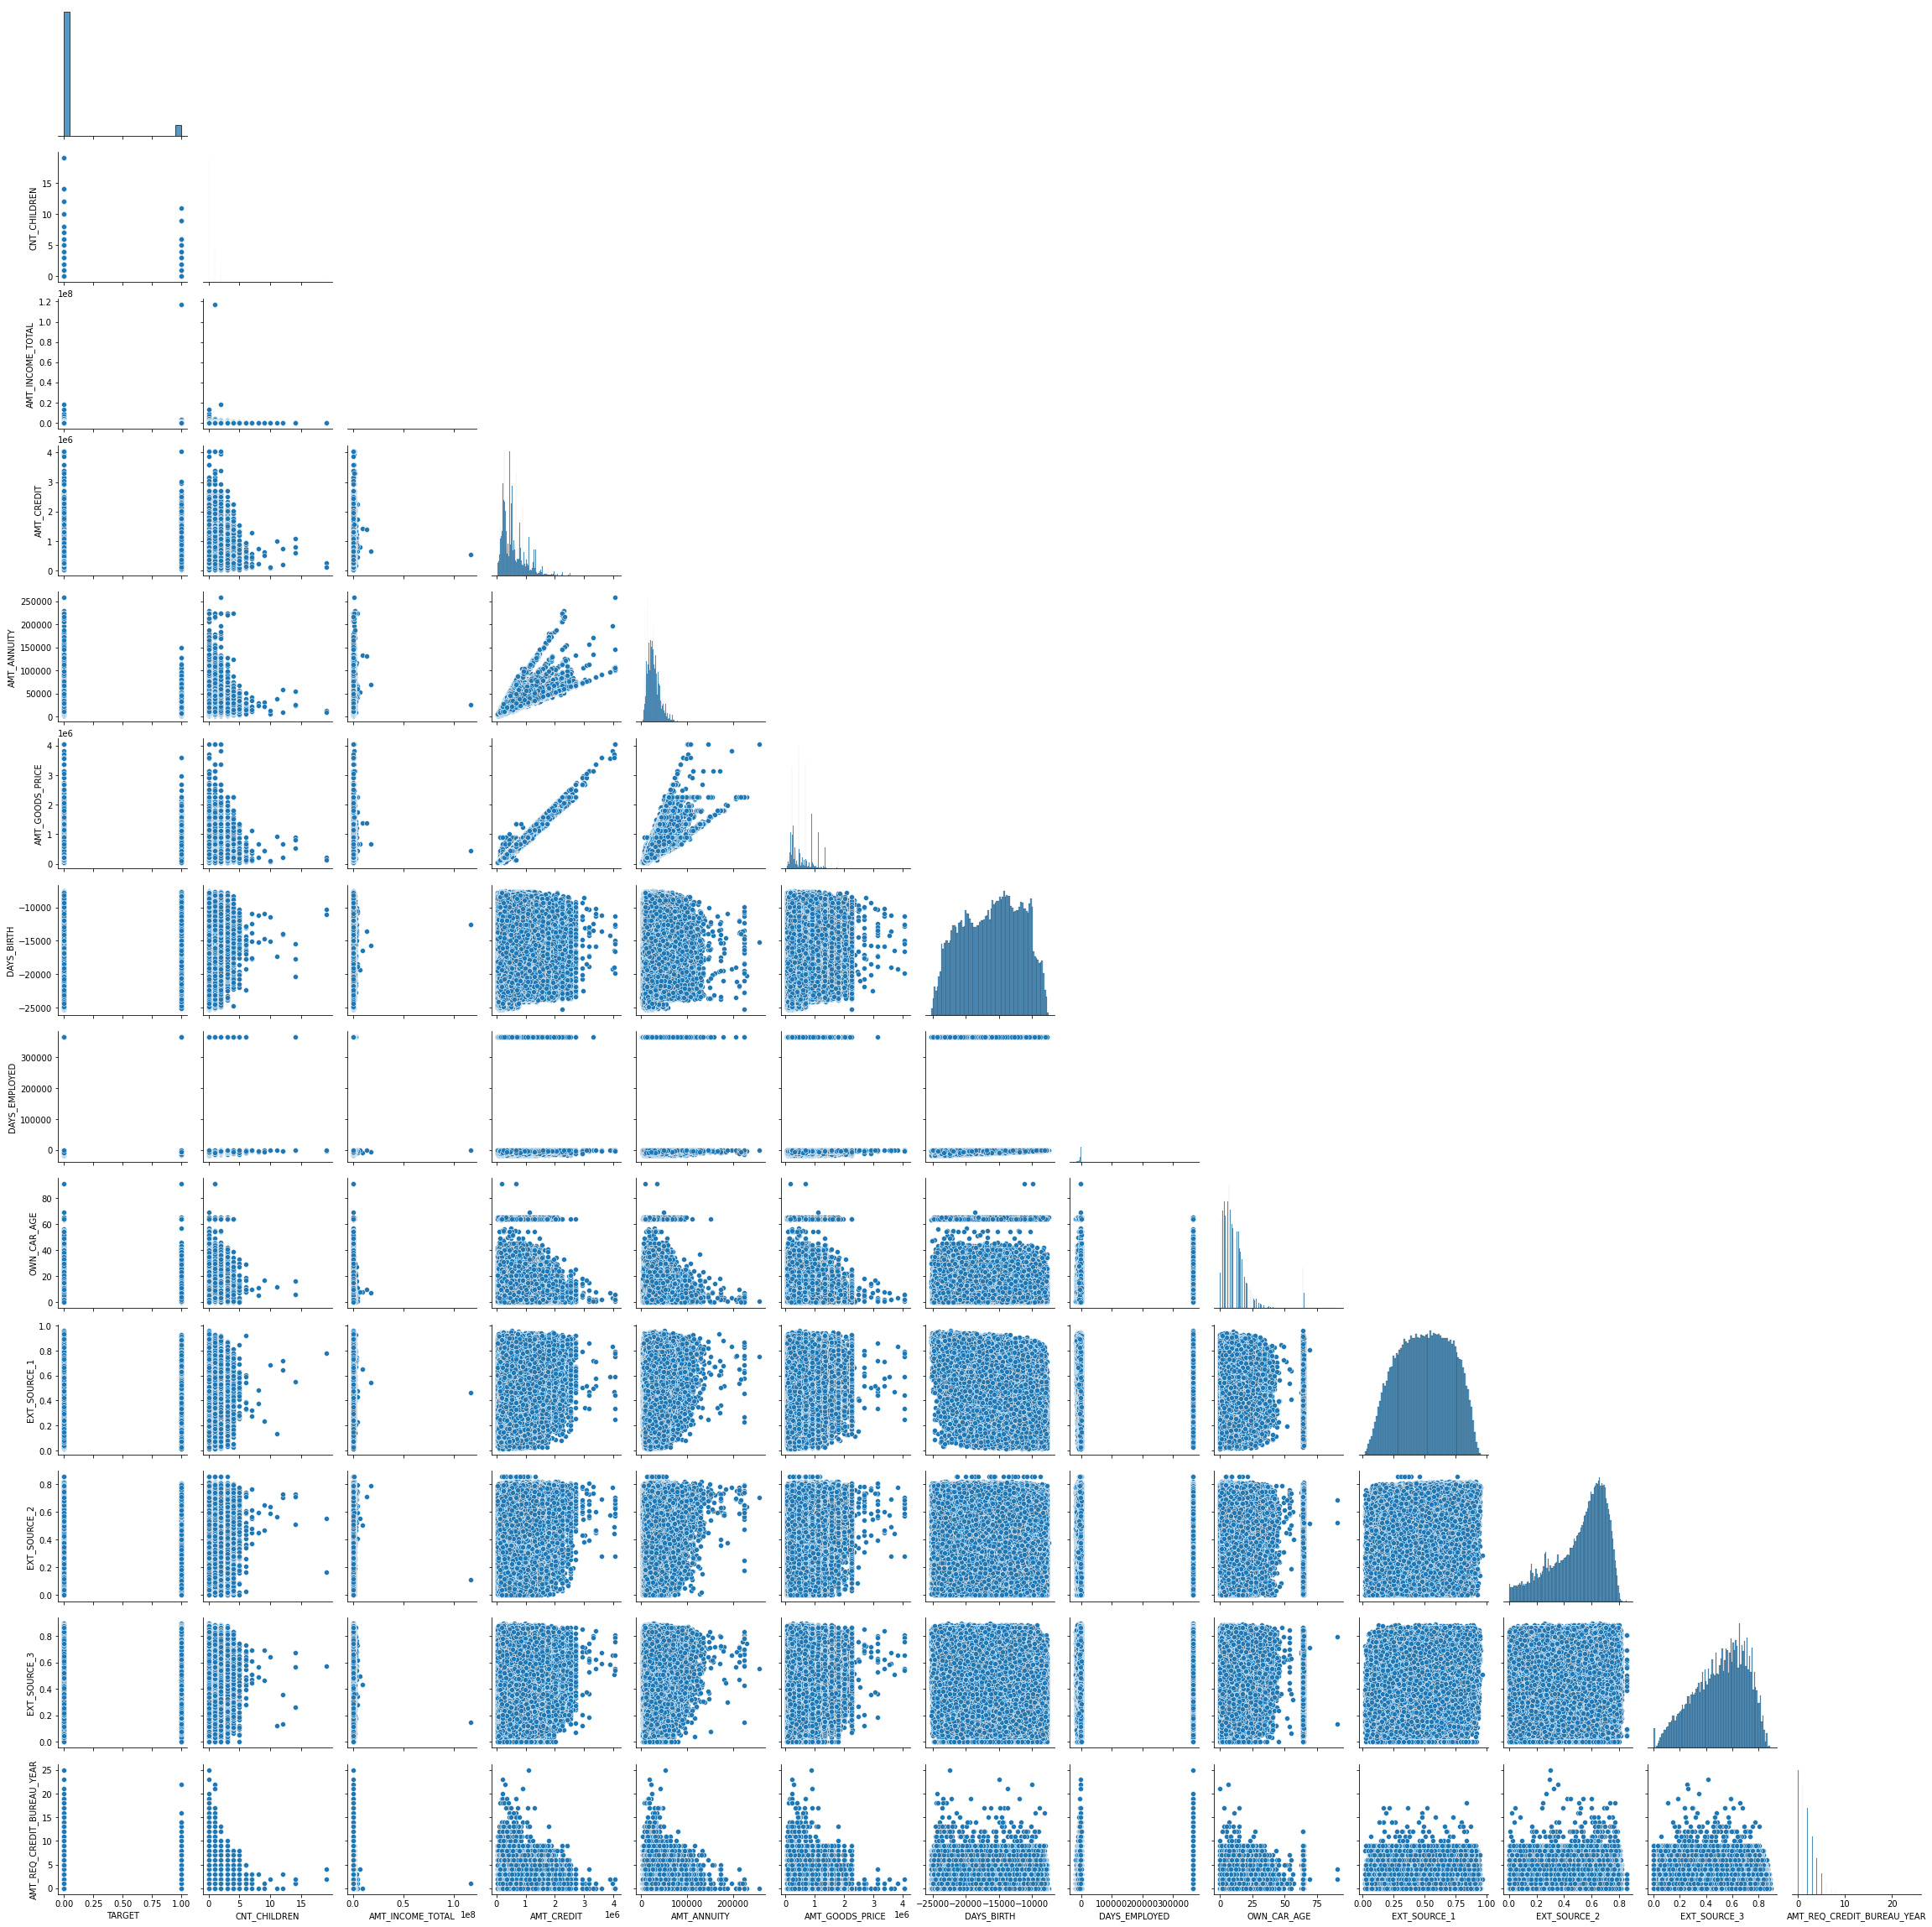

In [47]:
# Plot the pair-plot of all vars
# Plots against their own variable appear as Histograms by default
# Cut along the diagonal to reduce processing/drawing time

sns.pairplot(data=key_vars_df, kind='scatter', corner=True)

We can see there is some correlation between the three variables AMT_ANNUITY (loan payment), AMT_CREDIT (total size of loan), and AMT_GOODS_PRICE (value of the home).

We can also see there appears to be a diagonal 'cutoff' effect for many variables and AMT_REQ_CREDIT_BUREAU_YEAR, the number of credit bureau checks in a year. This could be a product of frequency - those variables with lower values are more common, and therefore more likely to have some people with additional credit checks being run against them.

We can also see a high outlier in DAYS_EMPLOYED. We will need to investigate and deal with that in Feature Engineering. There is also an outlier in AMT_INCOME_TOTAL which is skewing the data - we should investigate that single entry.

In [51]:
application_df['AMT_INCOME_TOTAL'].max()

117000000.0

In [52]:
application_df.loc[application_df['AMT_INCOME_TOTAL'].idxmax(),:]

SK_ID_CURR                        114967
TARGET                                 1
NAME_CONTRACT_TYPE            Cash loans
CODE_GENDER                            F
FLAG_OWN_CAR                           N
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY              0
AMT_REQ_CREDIT_BUREAU_WEEK             0
AMT_REQ_CREDIT_BUREAU_MON              0
AMT_REQ_CREDIT_BUREAU_QRT              0
AMT_REQ_CREDIT_BUREAU_YEAR             1
Name: 12840, Length: 75, dtype: object

The entry indicates an applicant earning an 8-figure income as a labourer, having missed payments on a 6-figure loan. It doesn't make a lot of sense to me -- if the income was correct, there should be no need for a loan, as the applicant could simply buy it outright. There is likely an error in the income. Our options are the remove it outright, or to reduce the income - I will choose the latter.

The mean income we saw earlier was 1.688 * 10^5, so a credible income for this entry would be the same entry * 10^5, i.e. with 3 less zeroes. This would be an entry error of 3 zeroes, which could believably happen. Let's make the change.

In [60]:
application_df.iloc[application_df['AMT_INCOME_TOTAL'].idxmax(), 7] = (application_df['AMT_INCOME_TOTAL'].max() / 1000)

In [61]:
# check new values
application_df.describe()['AMT_INCOME_TOTAL']

count    3.075110e+05
mean     1.684178e+05
std      1.088117e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

## 2. Feature Engineering

Next we need to continue with correcting our features.

Before we begin, we should take a moment to split the training and testing features. This will help avoid any possible information leakage into the testing data down the road. Note that we will use stratified splitting on the TARGET data to maintain the proportion of TARGETs in both Training and Test (92% negative, 8% positive).


In [108]:
X_train_df, X_test_df, Y_train, Y_test = train_test_split(application_df.drop(['SK_ID_CURR', 'TARGET'], axis=1),
                                                          application_df['TARGET'],
                                                          test_size=0.15, random_state=123, stratify=application_df['TARGET'])

In [109]:
X_train_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
138866,Cash loans,F,N,Y,0,130500.0,531706.5,29817.0,459000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
159622,Cash loans,M,N,Y,0,180000.0,1350000.0,37255.5,1350000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
193164,Cash loans,F,N,Y,0,117000.0,225000.0,12694.5,225000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
155477,Cash loans,M,N,N,0,157500.0,302206.5,12933.0,229500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
86279,Cash loans,F,N,N,0,175500.0,545040.0,26640.0,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237178,Cash loans,F,N,Y,0,270000.0,1102828.5,32373.0,963000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
219203,Cash loans,F,Y,Y,2,112500.0,135000.0,10444.5,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
145178,Cash loans,M,Y,Y,2,279000.0,900000.0,35824.5,900000.0,"Spouse, partner",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
236081,Cash loans,F,N,Y,0,112500.0,450000.0,22018.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


### 2.1 - Fixing OWN_CAR_AGE

There are a lot of nulls in OWN_CAR_AGE. They likely refer to entries where the applicant does not own a car, therefore no entry was made. We will compare with FLAG_OWN_CAR.

In [111]:
X_train_df.describe()['OWN_CAR_AGE']

count    88923.000000
mean        12.056048
std         11.928161
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64

In [112]:
X_train_df['OWN_CAR_AGE'].isnull().sum()

172461

In [113]:
X_train_df[X_train_df['FLAG_OWN_CAR'] == 'N'].isnull().sum().loc['OWN_CAR_AGE']

172456

We can see nearly all the nulls in the column also exist in the dataframe filtered down to applicants NOT owning a car, indicating that the most likely cause is not owning a car.

We will fill in the nulls with -20, a place holder value slightly less than -2*std.

In [114]:
X_train_df['OWN_CAR_AGE'].fillna(value=-20, inplace=True)

# Repeat this Transformation on the Test Data
X_test_df['OWN_CAR_AGE'].fillna(value=-20, inplace=True)

In [115]:
# Check for any possible remaining Nulls
X_train_df['OWN_CAR_AGE'].isnull().sum()

0

### 2.2 - Correcting the Outlier in DAYS_EMPLOYED

Recall that there was a large, high outlier in DAYS_EMPLOYED. This must be identified and dealt with. It is likely a placeholder value for something else, so let's investigate.


In [116]:
# Describe the positive outliers for Days Employed -- we want their Count and Distribution
X_train_df[X_train_df['DAYS_EMPLOYED'] > 0].describe()['DAYS_EMPLOYED']

count     46954.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [118]:
X_train_df['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'State servant', 'Working', 'Commercial associate',
       'Student', 'Unemployed', 'Businessman', 'Maternity leave'],
      dtype=object)

In [119]:
# Filter for both 'Is a Pensioner' and 'Has a Days_Employed value above 0', then display the Summary Stats for column DAYS_EMPLOYED
X_train_df[ (X_train_df['NAME_INCOME_TYPE'] == 'Pensioner') & (X_train_df['DAYS_EMPLOYED'] > 0) ].describe()['DAYS_EMPLOYED']

count     46935.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

We can see, again, that almost all the values are contained here. We will go ahead and replace them with a holding value of 5000, which is approx 2* std of the negative values.

In [120]:
# Compute the Std_Dev to check
std_days_emp = X_train_df[X_train_df['DAYS_EMPLOYED'] <= 0].std()['DAYS_EMPLOYED']
std_days_emp

2338.382031686733

In [121]:
# Replace the high values with 5000
X_train_df['DAYS_EMPLOYED'].mask(X_train_df['DAYS_EMPLOYED'] > 1, 5000.0, inplace=True)

#Repeat the transformation for the Test Set
X_test_df['DAYS_EMPLOYED'].mask(X_test_df['DAYS_EMPLOYED'] > 1, 5000.0, inplace=True)

## 2.3 - Building Calculated Features

Team member 'Phil' in Tunguz's (2018) discussion post suggests several simple-to-calculate features that improved the model:
1) Credit-to-Annuity ratio, indicative of an Interest Rate, i.e. Amt_Annuity/Amt_Credit
2) Amount of Down Payment, i.e. Amt_Goods_Price - Amt_Credit
3) Goods-Credit Ratio, i.e. Amt_Credit / Amd_Goods_Price

In [125]:
X_train_df['Credit_Annuity_Ratio'] = X_train_df.apply(lambda row: (row.AMT_ANNUITY / row.AMT_GOODS_PRICE), axis=1)
X_train_df['Down_Payment'] = X_train_df.apply(lambda  row: (row.AMT_GOODS_PRICE - row.AMT_CREDIT), axis=1)
X_train_df['Goods_Credit_Ratio'] = X_train_df.apply(lambda row: (row.AMT_CREDIT / row.AMT_GOODS_PRICE), axis=1)

In [127]:
# Apply same transforms to Test data
X_test_df['Credit_Annuity_Ratio'] = X_test_df.apply(lambda row: (row.AMT_ANNUITY / row.AMT_GOODS_PRICE), axis=1)
X_test_df['Down_Payment'] = X_test_df.apply(lambda  row: (row.AMT_GOODS_PRICE - row.AMT_CREDIT), axis=1)
X_test_df['Goods_Credit_Ratio'] = X_test_df.apply(lambda row: (row.AMT_CREDIT / row.AMT_GOODS_PRICE), axis=1)

## 2.4 - Filling in Unknown Occupations

Lastly, there are approx. 8200 Null values for Occupation_Type. I will fill those in with a 'Unknown' holding value.

In [140]:
X_train_df['OCCUPATION_TYPE'].isnull().sum()

81811

In [141]:
X_train_df['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Drivers', 'Core staff',
       'High skill tech staff', 'Private service staff', 'Managers',
       'Laborers', 'Accountants', 'HR staff', 'Sales staff',
       'Medicine staff', 'Cooking staff', 'Secretaries', 'Cleaning staff',
       'Low-skill Laborers', 'Realty agents', 'Waiters/barmen staff',
       'IT staff'], dtype=object)

In [142]:
X_train_df['OCCUPATION_TYPE'].fillna(value='Unknown', inplace=True)
X_test_df['OCCUPATION_TYPE'].fillna(value='Unknown', inplace=True)

## 3. Feature Selection

I will now do some feature selection. Recall that we have already dropped the problematic 'Building Information' columns in the middle of the original dataframe.

My goal is to perform both PCA, and a sample XGB Classifier, and look at the feature importances. I will add in a feature filled with Random integers, which can act as a marker - features with similar or lower importances are effectively acting like random info.

I will impute using simple 'mean' imputation to fill numerical nulls, and 'Most Frequent' imputing to catch any missing values in the Categorical data. This is a simple solution to implement, and offers quick computing of the missing values.

In [147]:
#Define columns for transformer
#Remember that the Document fields are already binary and full, so no more pre-processing is needed

binary_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
categ_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
              'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_TYPE_SUITE']
numeric_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'Credit_Annuity_Ratio', 'Down_Payment', 'Goods_Credit_Ratio']

In [166]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [167]:
# Make Binary Cols Pipeline
binary_transformer = Pipeline(steps=[
    ('bin_impute', SimpleImputer(strategy='most_frequent')),
    ('OHE', OneHotEncoder(drop='if_binary', sparse=False))
])

In [168]:
# Make Categorical Cols Pipeline
categ_transformer = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('OneHot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [169]:
col_transformer = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('categorical', categ_transformer, categ_cols),
        ('binary', binary_transformer, binary_cols)
    ],
    remainder='passthrough'
)

In [170]:
# Fit_Transform the Transformer on X_Train to create X_Train_Proc, where Proc stands for 'Pre Processed'
X_train_proc = col_transformer.fit_transform(X_train_df)

In [171]:
# Repeat the transformation only on the Test data
X_test_proc = col_transformer.transform(X_test_df)

#### Adding a Random Feature

I'll now calculate and add a Random feature to the X_Train data, which will be used to compute PCA and a sample XGB.

In [175]:
X_train_proc_df = pd.DataFrame(X_train_proc)

np.random.seed(321)
X_train_proc_df['rand'] = (np.random.randint(-100, 100, size=(X_train_proc_df.shape[0],1)) / 100)

In [176]:
X_train_proc_df

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,rand
0,-0.577057,-0.345798,-0.166998,0.187690,-0.214683,1.077811,-1.691506,1.711905,-2.228184,-1.411120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.74
1,-0.577057,0.107457,1.865581,0.701041,2.198023,0.309973,-1.425541,0.247967,1.350107,-1.370698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24
2,-0.577057,-0.469413,-0.928833,-0.993980,-0.848323,0.398692,-1.820251,1.711905,0.245711,-1.181179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.69
3,-0.577057,-0.098568,-0.737058,-0.977520,-0.836138,-1.149699,0.589016,-0.568221,0.794361,-0.851177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.59
4,-0.577057,0.066252,-0.133878,-0.031563,-0.239054,1.831200,1.402719,-0.040299,0.066895,0.295216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261379,-0.577057,0.931558,1.251626,0.364087,1.150080,0.269949,-0.200404,0.065964,-0.751965,1.683479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29
261380,2.190328,-0.510618,-1.152387,-1.149258,-1.092031,-1.013008,0.559693,-0.488524,1.222666,1.390585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.88
261381,2.190328,1.013968,0.747815,0.602284,0.979485,1.077811,0.470580,-1.377061,1.077911,-1.988955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12
261382,-0.577057,-0.510618,-0.369951,-0.350505,-0.239054,-0.192502,1.277410,0.210097,0.346755,1.500586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04


## 3.1 - PCA

I will now decompose the dataframe using PCA, using a number of variables equal to the length of the dataframe.

In [177]:
pca = PCA(n_components=X_train_proc_df.shape[1])

data_pca = pca.fit_transform(X_train_proc_df)

In [178]:
# We will now evaluate based on the Explained Variance Ratios
pca.explained_variance_ratio_

array([9.56429661e-02, 7.35801011e-02, 6.48629725e-02, 6.19192800e-02,
       4.20808662e-02, 4.09936601e-02, 3.40368670e-02, 3.35862080e-02,
       3.24112843e-02, 3.18978660e-02, 2.94791361e-02, 2.55187177e-02,
       2.52842753e-02, 2.49750735e-02, 2.35891921e-02, 2.31925680e-02,
       2.27065579e-02, 2.17940378e-02, 2.04477220e-02, 2.01498384e-02,
       1.82499021e-02, 1.72778281e-02, 1.66350088e-02, 1.44948675e-02,
       1.24639827e-02, 1.00831935e-02, 8.53852144e-03, 8.43194693e-03,
       7.58433407e-03, 7.37833765e-03, 6.91157682e-03, 6.21492763e-03,
       5.75127897e-03, 5.41808236e-03, 5.21439733e-03, 4.69356638e-03,
       4.38947847e-03, 4.23926455e-03, 4.18941284e-03, 4.16453648e-03,
       4.14489578e-03, 3.67851331e-03, 3.57613635e-03, 3.43859004e-03,
       3.34503357e-03, 2.95098714e-03, 2.93670772e-03, 2.89933241e-03,
       2.76755282e-03, 2.62109874e-03, 2.14432737e-03, 2.05193900e-03,
       2.03439244e-03, 1.90636529e-03, 1.85292748e-03, 1.74315321e-03,
      

[Text(0.5, 0, 'Primary Component (Number)'), Text(0, 0.5, 'Variance Ratio')]

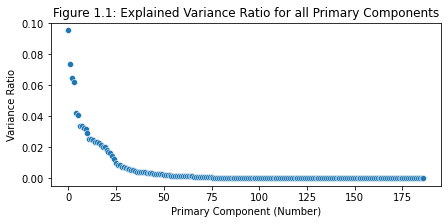

In [180]:
plt.figure(figsize=(7,3))
fig31 = sns.scatterplot(
    data=pca.explained_variance_ratio_
)
fig31.set_title('Figure 3.1: Explained Variance Ratio for all Primary Components')
fig31.set(xlabel = 'Primary Component (Number)',
       ylabel='Variance Ratio')

In [181]:
# Check total variance - should be 100% given all components are used
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [ ]:
"""
# It would be nice to have a Sum of all prior PCA values, to consider setting a cutoff level for the total information containt


# Initialize an array of zeroes
sum_pca = np.zeroes(len(pca.explained_variance_ratio_))

# Set initial value
sum_pca[0] = pca.explained_variance_ratio_[0]

# each value of SUM_PCA is the previous value, plus the newest corresponding PCA score
for i in range(1, len(pca.explained_variance_ratio_)):
    sum_pca[i] = sum_pca[i-1] + pca.explained_variance_ratio_[i]

"""

In [183]:
# Check variance after 75th PC
pca.explained_variance_ratio_[75:].sum()

0.013326983332090675

We can see that after the 75th PC, the contribution has dropped to nearly 0. For the remaining 100+ components, they are only contributing 1.3% of the total dataset's variance. Therefore we should expect to see only about 75 variables contributing to our models in a significant way.

Let's look at the contributions of individual variables to try and identify where the Random data was a major contributor. This should help us identify a cutoff point.

In [184]:
pca_component_df = pd.DataFrame(pca.components_)

pca_component_df

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.033310,2.674432e-01,4.560163e-01,3.942436e-01,4.485530e-01,1.830601e-01,5.141974e-03,-1.124829e-01,6.012590e-03,7.929389e-03,...,2.014952e-03,1.655695e-03,5.902023e-04,2.778523e-03,8.749046e-05,1.519913e-03,2.363973e-04,2.690420e-04,-1.111398e-04,-1.181268e-04
1,0.375013,4.190015e-02,6.409148e-03,3.789379e-02,1.831726e-03,-1.369860e-01,4.314074e-01,-3.057372e-01,2.602408e-01,1.630205e-01,...,6.631914e-04,7.844969e-05,2.366232e-04,1.624817e-03,4.618166e-05,1.592722e-03,6.577622e-05,1.136921e-04,1.209584e-04,6.596669e-04
2,-0.055486,-3.676433e-02,1.784263e-01,9.462064e-02,1.637598e-01,-1.689217e-01,-1.310408e-01,9.104366e-02,-2.750122e-02,-6.388842e-02,...,-5.434638e-04,-4.062862e-04,-6.390844e-05,6.752226e-04,-2.714723e-05,-1.515311e-04,6.361907e-05,1.187801e-04,-1.449562e-04,7.408348e-06
3,0.047772,4.463497e-02,-1.826629e-01,-9.779934e-02,-1.639156e-01,3.078914e-01,1.139184e-01,-6.621330e-02,3.921542e-03,4.547644e-02,...,5.283182e-04,5.129068e-04,-4.481863e-05,-9.542880e-04,1.530321e-05,2.381800e-04,-9.382610e-05,-1.411150e-04,1.258694e-04,-1.898501e-03
4,-0.246055,-2.488801e-02,-1.277697e-02,-4.350430e-02,-1.029795e-01,5.124078e-02,1.285551e-01,-6.320530e-02,1.450884e-02,2.365587e-01,...,1.168330e-04,6.606060e-04,-5.257485e-05,1.581544e-03,3.806413e-05,2.042796e-03,9.221438e-05,5.300531e-05,8.004842e-06,1.458469e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-0.000000,3.035766e-17,1.078193e-15,-6.968576e-17,-9.785322e-16,-6.246194e-17,1.050036e-17,-1.884917e-16,-7.778040e-18,2.821395e-17,...,2.016209e-16,1.235990e-16,3.477578e-17,2.836273e-16,-2.103013e-16,-1.966743e-16,1.230231e-16,2.547536e-17,8.666977e-16,8.456777e-18
183,0.000000,3.295975e-17,-5.272884e-16,-5.209746e-17,5.072459e-16,-2.602384e-17,1.178086e-16,6.052534e-17,-2.155591e-18,1.063560e-16,...,4.087442e-17,-4.245736e-16,1.082034e-16,-5.767956e-17,-5.057126e-17,7.459311e-17,1.122149e-17,-1.838604e-16,-7.113722e-17,3.968180e-17
184,0.000000,-8.673617e-19,6.622289e-16,-4.159840e-17,-5.708383e-16,6.403316e-18,1.741492e-16,5.004802e-17,5.314315e-17,-4.351043e-17,...,1.223861e-16,-9.497611e-17,-4.750432e-16,-2.808084e-17,-6.041039e-18,-1.298874e-16,-2.055444e-16,-1.210410e-17,-1.892543e-16,-5.475221e-17
185,-0.000000,-7.979728e-17,1.102253e-15,-6.855926e-17,-7.456047e-16,-4.396071e-17,-4.328601e-18,-4.836557e-17,-4.344508e-17,-4.247583e-17,...,1.619527e-16,1.856154e-16,6.955157e-17,8.673617e-18,-1.504669e-17,-2.385245e-17,2.793176e-17,-8.440853e-17,3.027364e-16,-2.308266e-16


In [186]:
pca_component_df.loc[:,186].sort_values(ascending=False)

26    0.125040
29    0.013069
32    0.003690
40    0.003383
15    0.003269
        ...   
34   -0.002423
20   -0.004189
36   -0.005767
28   -0.011022
27   -0.991914
Name: 186, Length: 187, dtype: float64

In [187]:
pca_component_df.loc[27,186]

-0.9919141458156312

We can see that the Random data has major contributions at the 26 and 27th PCs. This tells us that those PCs are deriving their difference from the random data, and that other data is not as significant as the random noise we added. Perhaps the cutoff should end up being as low as 25ish.

## 3.2 - Feature Importance to XGB

We will also build a simple XGB classifier, to evaluate the feature importance from.

In [193]:
xgb_feature_imp = XGBClassifier(
    n_estimators = 200,
    max_depth = 6,
    verbosity = 1,
    n_jobs = -1,
    random_state = 123,
    scale_pos_weight = 50
)

In [195]:
xgb_feature_imp.fit(X_train_proc_df,Y_train)

C:\Users\bcarr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=50, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

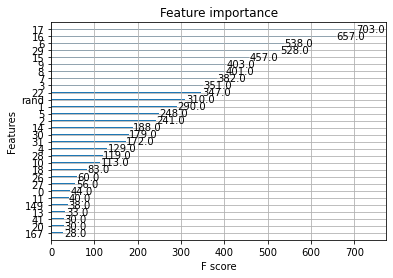

In [208]:
# Now we will use the built in Feature Importance plotting tool
# Unfortunately I can't figure out how to resize the plot, making readability challenging
# I will plot the top 30 and top 80 variables instead

plot_importance(xgb_feature_imp, max_num_features=30)
plt.show()

In [203]:
# We can see the Random data up alarmingly high, at the #11 feature.
# Let's check the other importance scores

xgb_feature_imp.feature_importances_

array([0.00419895, 0.00407871, 0.00587982, 0.00597857, 0.00748063,
       0.00468589, 0.00631182, 0.00644898, 0.00510009, 0.00551965,
       0.00552764, 0.00505252, 0.00420956, 0.00856003, 0.00487681,
       0.00878705, 0.01327959, 0.01375632, 0.00436023, 0.00724314,
       0.00656354, 0.00814633, 0.00599076, 0.00717799, 0.00865526,
       0.00421577, 0.00543046, 0.00610555, 0.005663  , 0.00749965,
       0.00635964, 0.00902867, 0.        , 0.00491262, 0.00079739,
       0.01128889, 0.00536683, 0.00136966, 0.        , 0.00998207,
       0.00415459, 0.02291016, 0.00478329, 0.00297515, 0.00683189,
       0.00451225, 0.00987298, 0.00469163, 0.00574679, 0.        ,
       0.00640133, 0.00570182, 0.00569399, 0.00383343, 0.00669641,
       0.00374964, 0.0050641 , 0.00768999, 0.00478409, 0.00495409,
       0.00857476, 0.00695983, 0.00238952, 0.00665825, 0.0050447 ,
       0.0065067 , 0.00582606, 0.00277546, 0.00581678, 0.00565263,
       0.00475817, 0.00360286, 0.00477961, 0.0042039 , 0.00470

In [225]:
# The Random data is rated at 0.005036 here. Let's take that to be a cutoff.
# Convert the importances to a Dataframe for manipulation

xgb_imp_df = pd.DataFrame(xgb_feature_imp.feature_importances_)

In [230]:
# How many features are equal to or above the random, in importance?
xgb_imp_df[xgb_imp_df >= xgb_feature_imp.feature_importances_[186]].count()

0    94
dtype: int64

[Text(0.5, 0, 'Feature Number'), Text(0, 0.5, 'Relative Importance')]

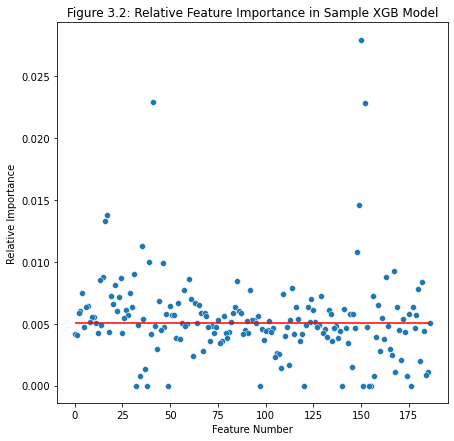

In [231]:
plt.figure(figsize=(7,7))
fig32 = sns.scatterplot(
    data=xgb_imp_df[0].sort_values(ascending=False)
)
plt.hlines(y=xgb_feature_imp.feature_importances_[186], xmin=0, xmax=186, colors='red')
fig32.set_title('Figure 3.2: Relative Feature Importance in Sample XGB Model')
fig32.set(xlabel = 'Feature Number',
       ylabel='Relative Importance')

We can see about half the features have an importance above the Random feature's, and half do not. That lines up with the 94 from above.

Given a cutoff around 75 from the PCA, and 94 form the XGB, I will err on the side of using too much and keep the top 100 features. It is a nice round number.

## 3.3 - Cutting down to the top 100 Features



In [235]:
# Make a list of the indexes of the top 101 features -- we will need to drop the Random at 186, as it is not in the original data
top_101_list = xgb_imp_df[0].nlargest(n=101).index.tolist()
top_101_list

[150,
 41,
 152,
 149,
 17,
 16,
 35,
 148,
 39,
 46,
 167,
 31,
 15,
 163,
 24,
 60,
 13,
 85,
 182,
 21,
 114,
 180,
 92,
 57,
 29,
 4,
 109,
 156,
 19,
 129,
 23,
 124,
 61,
 44,
 54,
 63,
 20,
 159,
 65,
 7,
 50,
 122,
 30,
 116,
 177,
 169,
 6,
 84,
 141,
 27,
 133,
 125,
 86,
 22,
 3,
 83,
 87,
 2,
 66,
 68,
 175,
 144,
 146,
 48,
 134,
 51,
 179,
 52,
 28,
 69,
 78,
 96,
 10,
 9,
 161,
 26,
 36,
 117,
 172,
 75,
 113,
 94,
 93,
 102,
 90,
 126,
 82,
 123,
 8,
 56,
 11,
 64,
 95,
 186,
 59,
 33,
 128,
 121,
 14,
 164,
 137]

In [237]:
top_101_list.remove(186)

In [253]:
x_train_cut = X_train_proc_df[top_101_list]
x_train_cut

,150,41,152,149,17,16,35,148,39,46,...,11,64,95,59,33,128,121,14,164,137
0,0.0,0.0,0.0,1.0,0.690902,0.734731,1.0,0.0,0.0,1.0,...,-0.167525,0.0,0.0,0.0,0.0,0.0,0.0,-0.327234,0.0,0.0
1,1.0,0.0,0.0,0.0,0.263439,-1.840585,0.0,0.0,0.0,1.0,...,-0.167525,0.0,0.0,0.0,0.0,0.0,0.0,-0.633718,0.0,0.0
2,0.0,0.0,0.0,1.0,-2.475633,1.084285,1.0,0.0,0.0,1.0,...,-0.167525,0.0,0.0,0.0,0.0,0.0,0.0,-0.940201,0.0,0.0
3,1.0,0.0,0.0,0.0,-0.127623,1.188419,0.0,0.0,0.0,1.0,...,-0.167525,0.0,0.0,0.0,0.0,0.0,0.0,0.285733,0.0,0.0
4,0.0,0.0,0.0,1.0,-1.240983,1.130549,0.0,0.0,1.0,0.0,...,-1.265104,0.0,0.0,0.0,0.0,0.0,0.0,0.592217,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261379,0.0,0.0,0.0,1.0,1.605778,0.614620,0.0,0.0,0.0,1.0,...,-0.167525,0.0,0.0,0.0,1.0,0.0,0.0,0.285733,0.0,0.0
261380,0.0,1.0,1.0,1.0,-1.720604,-0.672493,0.0,0.0,1.0,1.0,...,2.027634,0.0,0.0,0.0,0.0,0.0,0.0,-1.246685,0.0,0.0
261381,1.0,1.0,1.0,0.0,-1.240983,1.073714,0.0,0.0,0.0,1.0,...,2.027634,0.0,0.0,0.0,1.0,0.0,0.0,1.818151,0.0,0.0
261382,0.0,0.0,0.0,1.0,-1.585051,0.034525,0.0,0.0,0.0,1.0,...,-0.167525,0.0,0.0,0.0,1.0,0.0,0.0,-1.246685,1.0,0.0


In [254]:
# Repeat the transform for X_Test
x_test_cut = pd.DataFrame(X_test_proc)[top_101_list]
x_test_cut

,150,41,152,149,17,16,35,148,39,46,...,11,64,95,59,33,128,121,14,164,137
0,0.0,0.0,0.0,1.0,6.619742e-01,-0.340700,0.0,0.0,0.0,0.0,...,-1.265104,0.0,0.0,0.0,1.0,0.0,0.0,0.285733,0.0,0.0
1,1.0,0.0,1.0,0.0,-2.307215e-01,-1.030563,0.0,0.0,1.0,0.0,...,-1.265104,0.0,0.0,0.0,0.0,0.0,0.0,-1.553168,1.0,0.0
2,1.0,0.0,0.0,0.0,-9.541722e-01,-1.575263,0.0,0.0,1.0,1.0,...,-0.167525,0.0,0.0,0.0,0.0,0.0,0.0,0.592217,0.0,0.0
3,0.0,1.0,1.0,1.0,-7.927653e-01,-1.915286,0.0,0.0,1.0,1.0,...,-0.167525,0.0,0.0,0.0,0.0,0.0,0.0,-0.020750,0.0,0.0
4,1.0,0.0,0.0,0.0,1.485560e+00,1.338563,0.0,0.0,1.0,1.0,...,-0.167525,0.0,0.0,0.0,0.0,0.0,0.0,0.592217,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46122,0.0,1.0,0.0,1.0,-6.359339e-16,0.692540,0.0,0.0,1.0,1.0,...,0.930055,0.0,0.0,0.0,0.0,0.0,0.0,1.511667,0.0,0.0
46123,0.0,0.0,0.0,1.0,-6.359339e-16,0.729339,0.0,0.0,0.0,1.0,...,2.027634,0.0,0.0,0.0,0.0,0.0,0.0,0.285733,1.0,0.0
46124,1.0,0.0,1.0,0.0,-3.436134e-01,-1.788738,0.0,0.0,1.0,1.0,...,-0.167525,0.0,0.0,0.0,0.0,0.0,0.0,0.592217,0.0,0.0
46125,0.0,1.0,0.0,1.0,-6.359339e-16,0.169591,0.0,0.0,0.0,0.0,...,-1.265104,0.0,0.0,0.0,1.0,0.0,0.0,-0.327234,0.0,0.0


In [255]:
X_test_proc

array([[-0.57705729,  0.31348251,  0.85288509, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57705729,  1.42601859, -0.6998703 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.57705729, -0.38700317, -0.92883343, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.57705729,  0.51950771, -0.03462087, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57705729, -0.92266869, -1.3759397 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.57705729, -0.42820821, -0.22465222, ...,  0.        ,
         0.        ,  0.        ]])

## 4. Model Selection & Evaluation

We will now test a number of XGB models using cross-validation to tune their hyperameters. We will use an exhaustive Grid Search

In [256]:
# Define our Grid of variables to try
# We will test Depths, Weights, Learning Rate (eta), Gamma
grid = {'max_depth' : [6,8,10],
        'scale_pos_weight' : [10, 30, 50, 80],
        'learning_rate' : [0.01, 0.05, 0.1, 0.3],
        'gamma' : [0, 0.1, 1]
        }

In [257]:
xgb_cv = XGBClassifier(
    n_estimators = 50,
    n_jobs = -1,
    random_state = 123,
)

In [259]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)


In [264]:
grid_cross_val = GridSearchCV(xgb_cv, grid,
                       n_jobs=-1,
                       scoring='roc_auc',
                       cv=skf,
                       verbose=2)

In [265]:
grid_cross_val.fit(x_train_cut, Y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 55.1min finished
C:\Users\bcarr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=7, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_ch...
                                     n_estimators=50, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=123, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                               

In [266]:
# Let's see the results
grid_cross_val.cv_results_

{'mean_fit_time': array([ 55.75057805,  62.65699911,  68.34313947,  57.06627494,
         75.11563557,  87.46523798,  98.00295407,  85.73498732,
        108.02672768, 113.85934657, 134.62131286, 125.77211326,
         49.05463088,  41.92257047,  56.10806316,  54.19848448,
        107.73922497,  97.98106152,  79.12349099,  83.52729279,
        149.52621293, 129.73565906, 105.7194404 , 114.53823793,
         54.17937058,  56.81167811,  69.22219884,  67.20845032,
         79.23067588,  81.81029677,  95.0582723 ,  88.57095617,
        106.71225321, 106.90248144, 136.19758612, 125.91946578,
         52.19698006,  49.00495243,  52.27065349,  54.26603448,
         97.66748738,  70.18024677,  72.95731962,  69.41612148,
         99.7300728 , 104.78985095, 124.42122203, 132.05309153,
         52.66743153,  55.9428091 ,  64.72848237,  66.21520394,
         77.7061013 ,  71.02009743,  91.54034537,  95.78324646,
        155.76618457, 105.67425704, 133.80208522, 126.72114712,
         54.71350449,  

In [267]:
grid_cross_val.best_score_

0.7538232377370753

In [269]:
grid_cross_val.best_params_

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'scale_pos_weight': 10}

Let's rebuild the model using these parameters. We will do one last cross validation on the number of estimators to find an optimal number there.

In [271]:
xgb_num_est = XGBClassifier(
    n_jobs=-1,
    random_state=123,
    gamma=1,
    learning_rate = 0.1,
    max_depth = 6,
    scale_pos_weight = 10
)

In [273]:
grid_cv_num_est = GridSearchCV(xgb_num_est,
                               {'n_estimators': [50, 100, 150, 200, 250]},
                               n_jobs = -1,
                               scoring='roc_auc',
                               cv=skf,
                               verbose=2
)

In [274]:
# fit for N_Estimators
grid_cv_num_est.fit(x_train_cut, Y_train)

C:\Users\bcarr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=7, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=1,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=6, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=123, reg_alpha=None,
                        

In [275]:
grid_cv_num_est.best_params_

{'n_estimators': 200}

In [276]:
grid_cv_num_est.best_score_

0.7578169938175849

Now having all our optimal parameters, let's build and test our model.

In [277]:
xgb = XGBClassifier(
    n_jobs=-1,
    random_state=123,
    gamma=1,
    learning_rate = 0.1,
    max_depth = 6,
    scale_pos_weight = 10,
    n_estimators = 200
)

In [278]:
xgb.fit(x_train_cut, Y_train)

C:\Users\bcarr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [284]:
# Accuracy Score
xgb.score(x_test_cut, Y_test)

0.7578424783749214

In [281]:
roc_auc_score(Y_test, xgb.predict(x_test_cut))

0.6855584818302558

In [282]:
# Let's look at the Confusion Matrix
confusion_matrix(Y_test, xgb.predict(x_test_cut))

array([[32725,  9678],
       [ 1492,  2232]], dtype=int64)

In [285]:
precision_score(Y_test, xgb.predict(x_test_cut))

0.18740554156171285

In [286]:
recall_score(Y_test, xgb.predict(x_test_cut))

0.5993555316863588

In [287]:
f1_score(Y_test, xgb.predict(x_test_cut))

0.2855315338365102

## 5. Conclusions and Recommendations



When provided new data to test on, the model is able to accurately predict the repaying ability of 75.8% of applicants.

With a recall of 59.9%, 40% of those who would truly have difficulty paying are predicted incorrectly as good investments. This seems like a substantial amount.
Further, the precision of 18.7% indicates that there are many applicants who would be good payees who are still being refused. This represents a lost business opportunity for those 82% of customers who would be improperly denied.

We would require more information about historical success and failure to make a proper recommendation. However, given previous best results of 68.5% accuracy and 22.1% recall, this latest model represents a clear improvement. At a minimum, I would recommend further work with domain experts to identify ways the model could be improved; additional predictive measures to explore; etc.